In [34]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [35]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [36]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [37]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [38]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kodinsk ru
ushuaia ar
lavrentiya ru
novosheshminsk ru
sosnogorsk ru
kavieng pg
jamestown sh
ust-kuyga ru
hofn is
kavieng pg
salekhard ru
isangel vu
puerto ayora ec
tyrma ru
castro cl
ayer itam my
tiksi ru
tautira pf
svirstroy ru
ancud cl
albany au
andevoranto mg
atuona pf
albany au
gundlupet in
busselton au
mataura pf
rikitea pf
amderma ru
san antonio cl
krasnogorsk ru
santa luzia br
bredasdorp za
illoqqortoormiut gl
pereslavl-zalesskiy ru
latung ph
north bend us
rikitea pf
mataura pf
sao joao da barra br
vila velha br
palmer us
vvedenskoye ru
aldan ru
ushuaia ar
ushuaia ar
morgantown us
qaanaaq gl
donskoye ru
gao ml
camacha pt
bethel us
barentsburg sj
iqaluit ca
san rafael ar
busselton au
taltal cl
puerto ayora ec
hobart au
ixtapa mx
vaini to
east london za
tuatapere nz
bluff nz
lyubinskiy ru
hithadhoo mv
cape town za
taolanaro mg
new norfolk au
hermanus za
santa ana pe
busselton au
avarua ck
tiksi ru
jamestown sh
tessalit ml
sovetskoye ru
buckingham ca
winnemucca us
taolanaro mg
seve

norman wells ca
leshukonskoye ru
plettenberg bay za
hermanus za
barranco pa
mar del plata ar
lagoa vermelha br
mahebourg mu
northam au
dianopolis br
fortuna us
nelson bay au
amderma ru
albany au
port lincoln au
bluff nz
galanesti ro
hobart au
cape town za
jamestown sh
agirish ru
port elizabeth za
rikitea pf
ushuaia ar
mitsamiouli km
letterkenny ie
butaritari ki
werda bw
rikitea pf
lebu cl
palabuhanratu id
carnarvon au
port hardy ca
buinsk ru
vestbygda no
punta arenas cl
rikitea pf
norman wells ca
marienburg sr
dingle ie
hobart au
hede cn
rikitea pf
mar del plata ar
kruisfontein za
hithadhoo mv
saskylakh ru
chapleau ca
rikitea pf
salta ar
port alfred za
mikhaylovka kz
vaini to
kapaa us
ribeira grande pt
attawapiskat ca
atuona pf
lagoa pt
avarua ck
tiksi ru
onega ru
makung tw
constitucion mx
abasolo mx
mataura pf
kieta pg
vallenar cl
parkersburg us
jamestown sh
carnarvon au
kapaa us
new norfolk au
ushuaia ar
marang my
beroroha mg
rikitea pf
kusu jp
velyka mykhaylivka ua
taoudenni ml
puer

san policarpo ph
souillac mu
san borja bo
san patricio mx
belyy yar ru
thompson ca
soyo ao
busselton au
busselton au
praia da vitoria pt
teya ru
warburton pk
taltal cl
alice springs au
jamestown sh
lebu cl
thompson ca
narsaq gl
bredasdorp za
yellowknife ca
flin flon ca
yinchuan cn
palmer us
qaanaaq gl
port elizabeth za
hobyo so
vestmannaeyjar is
lluta pe
champerico gt
itaporanga br
bengkulu id
albany au
bairiki ki
udachnyy ru
cape town za
hilo us
barrow us
coahuayana mx
mahebourg mu
airai pw
vaini to
acarau br
ilulissat gl
ghanzi bw
cayenne gf
rawson ar
alofi nu
ribeira grande pt
bathsheba bb
mataura pf
lebu cl
san patricio mx
dikson ru
paamiut gl
nizhneyansk ru
kyren ru
souillac mu
betafo mg
bethel us
tuktoyaktuk ca
ribeira grande pt
jhang pk
ponta do sol cv
soto la marina mx
dikson ru
tsihombe mg
bluff nz
east angus ca
mataura pf
puerto ayora ec
mataura pf
busselton au
tuktoyaktuk ca
nenjiang cn
illoqqortoormiut gl
norman wells ca
tuggurt dz
olenino ru
busselton au
urengoy ru
umzimvu

In [39]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


656

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d743ae157c975fc4cc5737c8a844c283


In [42]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [43]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [44]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the U# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...


KeyboardInterrupt: 

In [45]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodinsk,58.6881,99.1844,8.17,98,88,3.89,RU,2022-03-23 20:01:36
1,Ushuaia,-54.8000,-68.3000,43.48,83,100,8.25,AR,2022-03-23 20:01:36
2,Lavrentiya,65.5833,-171.0000,0.97,75,1,4.41,RU,2022-03-23 20:01:37
3,Novosheshminsk,55.0651,51.2338,31.10,89,94,7.31,RU,2022-03-23 20:01:37
4,Sosnogorsk,63.6023,53.8817,18.84,87,82,7.52,RU,2022-03-23 20:01:37
5,Kavieng,-2.5744,150.7967,81.45,79,100,8.81,PG,2022-03-23 20:01:37
6,Jamestown,42.0970,-79.2353,43.52,10,81,19.10,US,2022-03-23 19:57:52
7,Ust-Kuyga,70.0167,135.6000,-1.79,100,100,3.00,RU,2022-03-23 20:01:38
8,Hofn,64.2539,-15.2082,35.96,79,100,4.27,IS,2022-03-23 20:01:13
9,Salekhard,66.5300,66.6019,17.65,87,100,9.33,RU,2022-03-23 20:01:38


In [46]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodinsk,RU,2022-03-23 20:01:36,58.6881,99.1844,8.17,98,88,3.89
1,Ushuaia,AR,2022-03-23 20:01:36,-54.8000,-68.3000,43.48,83,100,8.25
2,Lavrentiya,RU,2022-03-23 20:01:37,65.5833,-171.0000,0.97,75,1,4.41
3,Novosheshminsk,RU,2022-03-23 20:01:37,55.0651,51.2338,31.10,89,94,7.31
4,Sosnogorsk,RU,2022-03-23 20:01:37,63.6023,53.8817,18.84,87,82,7.52
5,Kavieng,PG,2022-03-23 20:01:37,-2.5744,150.7967,81.45,79,100,8.81
6,Jamestown,US,2022-03-23 19:57:52,42.0970,-79.2353,43.52,10,81,19.10
7,Ust-Kuyga,RU,2022-03-23 20:01:38,70.0167,135.6000,-1.79,100,100,3.00
8,Hofn,IS,2022-03-23 20:01:13,64.2539,-15.2082,35.96,79,100,4.27
9,Salekhard,RU,2022-03-23 20:01:38,66.5300,66.6019,17.65,87,100,9.33


In [47]:
# Column Arrangement
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodinsk,RU,2022-03-23 20:01:36,58.6881,99.1844,8.17,98,88,3.89
1,Ushuaia,AR,2022-03-23 20:01:36,-54.8000,-68.3000,43.48,83,100,8.25
2,Lavrentiya,RU,2022-03-23 20:01:37,65.5833,-171.0000,0.97,75,1,4.41
3,Novosheshminsk,RU,2022-03-23 20:01:37,55.0651,51.2338,31.10,89,94,7.31
4,Sosnogorsk,RU,2022-03-23 20:01:37,63.6023,53.8817,18.84,87,82,7.52
5,Kavieng,PG,2022-03-23 20:01:37,-2.5744,150.7967,81.45,79,100,8.81
6,Jamestown,US,2022-03-23 19:57:52,42.0970,-79.2353,43.52,10,81,19.10
7,Ust-Kuyga,RU,2022-03-23 20:01:38,70.0167,135.6000,-1.79,100,100,3.00
8,Hofn,IS,2022-03-23 20:01:13,64.2539,-15.2082,35.96,79,100,4.27
9,Salekhard,RU,2022-03-23 20:01:38,66.5300,66.6019,17.65,87,100,9.33


In [48]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [49]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

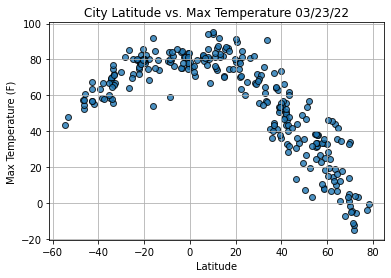

In [50]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

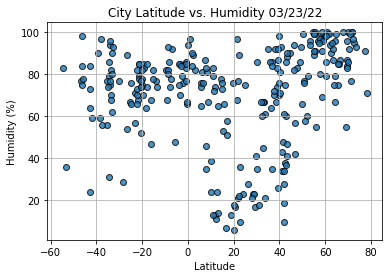

In [51]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


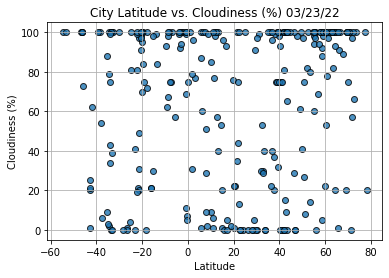

In [52]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

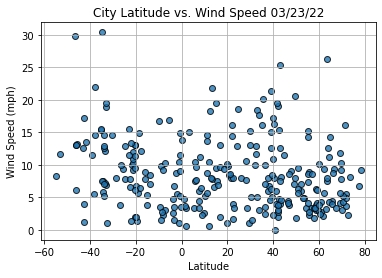

In [53]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [55]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [58]:
index13 = city_data_df.loc[13]
index13

City                       Castro
Country                        BR
Date          2022-03-23 20:01:04
Lat                      -24.7911
Lng                      -50.0119
Max Temp                    72.03
Humidity                       76
Cloudiness                     81
Wind Speed                   7.87
Name: 13, dtype: object

In [64]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
270    False
271    False
272     True
273     True
274     True
Name: Lat, Length: 275, dtype: bool

In [66]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodinsk,RU,2022-03-23 20:01:36,58.6881,99.1844,8.17,98,88,3.89
2,Lavrentiya,RU,2022-03-23 20:01:37,65.5833,-171.0000,0.97,75,1,4.41
3,Novosheshminsk,RU,2022-03-23 20:01:37,55.0651,51.2338,31.10,89,94,7.31
4,Sosnogorsk,RU,2022-03-23 20:01:37,63.6023,53.8817,18.84,87,82,7.52
6,Jamestown,US,2022-03-23 19:57:52,42.0970,-79.2353,43.52,10,81,19.10


In [67]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

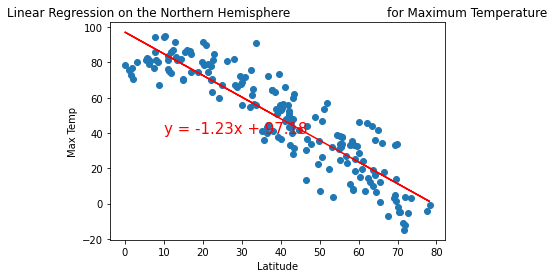

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

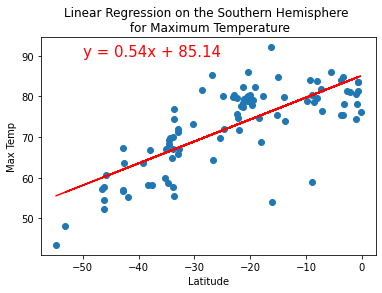

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))


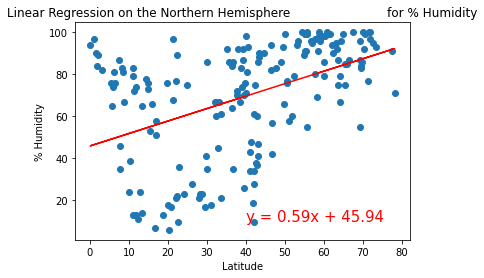

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

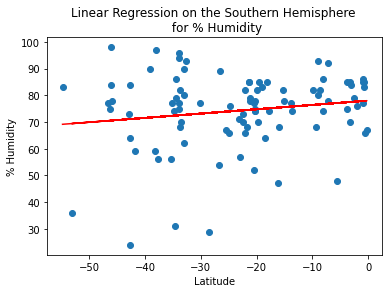

In [76]:
#  Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

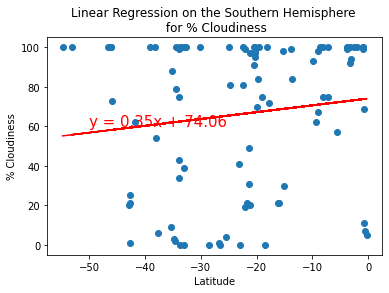

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))


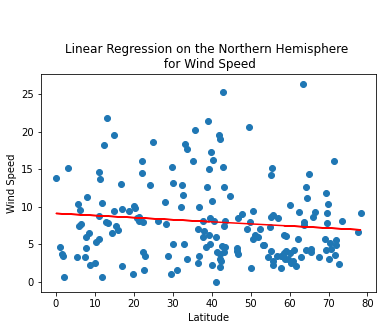

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

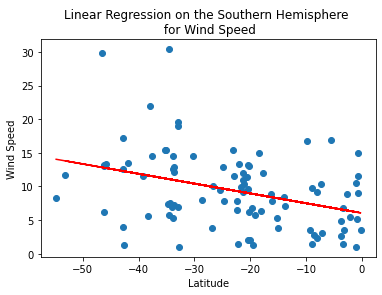

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))
